1. BUSSINESS UNDERSTANDING

    Masuk ke dalam tahap pertama dari model CRISP-DM, Bagaimana Membangun dan Mendapatkan data Dan menentukan Tujuan. 
--Bussiness Problem :
  Pulau Sumatera mempunyai lebih dari 50 persen lahan pertanian setiap provinsinya dengan komoditas pangan utama paling dominan adalah padi, sedangkan sisanya adalah jagung, kacang tanah, dan ubi. Hasil pertanian di Sumatera sangat rentan terhadap perubahan iklim karena dapat memengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil. Perubahan iklim dapat memberikan dampak negatif terhadap produksi bahan pokok tersebut. Apalagi bertambahnya suhu bumi akibat dampak dari pemanasan global yang akan mempengaruhi pola presipitasi, evaporasi, water-run off, kelembaban tanah, dan variasi iklim yang sangat fluktuatif secara keseluruhan dapat mengancam keberhasilan hasil produksi pertanian. Prediksi hasil pertanian komoditas bahan pangan banyak dipengaruhi oleh perubahan cuaca (climate change). Untuk mendukung Sustainable Development Goals dunia, kita sebagai data scientist perlu membangun model prediktif dari masalah yang disebutkan.

--Himpunan Data :
  Data ini diperoleh dari kaggle.com "https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera"

--Tujuan :
  Analisis ini untuk mengetahui Berapa estimasi jumlah Produksi pada Pada Pulau Sumatra, peningkatan produksi tanaman pangan dan hortikultura secara berkelanjutan

2. Data Understanding
Pada Analisis ini menggunakan model Regresi Linear maka tipe data yang cocok yaitu numerik (int,float)
Berikut Himpunan Data yang sudah dipilih(Dataset) beserta tipe data :


 0   Provinsi             (object) 
 1   Tahun                (Int64) 
 2   Luas_Panen           (float64) ✓
 3   Curah_hujan          (float64) ✓
 4   Kelembapan           (float64) ✓
 5   Suhu_ratarata        (float64) ✓


Terdapat tipe data float64(5), int64(1), dan object(1)

3. Data Preparation

Tahap ini memastikan data yang tepat berdasarkan model algoritma yang digunakan yaitu Regresi Linear
Data yang tepat untuk digunakan : Provinsi,Tahun,Produksi,Luas_Panen,Curah_hujan,Kelembapan,Suhu_ratarata.

(x)feature : Provinsi,Tahun,Luas_Panen,Curah_hujan,Kelembapan,Suhu_ratarata.
(y)label :Produksi

5. Evaluation
Pada tahap ini akan dilakukan evaluasi terhadap keefektifan dan kualitas model sebelum digunakan 
dan menentukan apakah model dapat mencapat tujuan yang ditetapkan pada fase awal (Business Understanding).

6. Deployment
Pada tahap ini, pengetahuan atau informasi yang telah diperoleh dari analisis akan diatur 
dan dipresentasikan dalam bentuk aplikasi streamlit sehingga dapat digunakan oleh pengguna. 

# Deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

# Deskripsi Dataset

In [3]:
df.head()

,Provinsi,Tahun,Produksi,Luas_Panen,Curah_hujan,Kelembapan,Suhu_ratarata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [64]:
df.isnull().sum()

Provinsi         0
Tahun            0
Produksi         0
Luas_Panen       0
Curah_hujan      0
Kelembapan       0
Suhu_ratarata    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       224 non-null    object 
 1   Tahun          224 non-null    int64  
 2   Produksi       224 non-null    float64
 3   Luas_Panen     224 non-null    float64
 4   Curah_hujan    224 non-null    float64
 5   Kelembapan     224 non-null    float64
 6   Suhu_ratarata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


<AxesSubplot:>

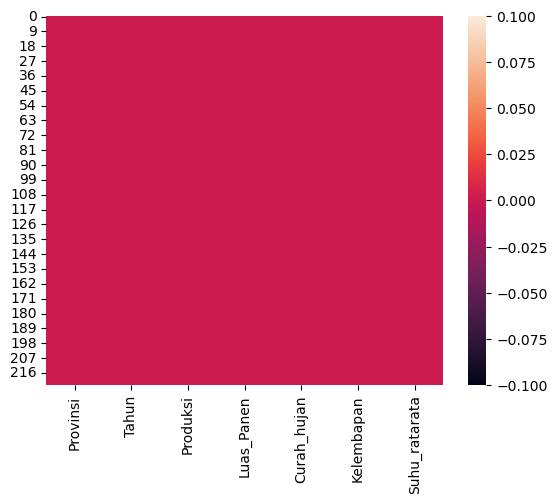

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Tahun,Produksi,Luas_Panen,Curah_hujan,Kelembapan,Suhu_ratarata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


# Visualisasi Data

<AxesSubplot:>

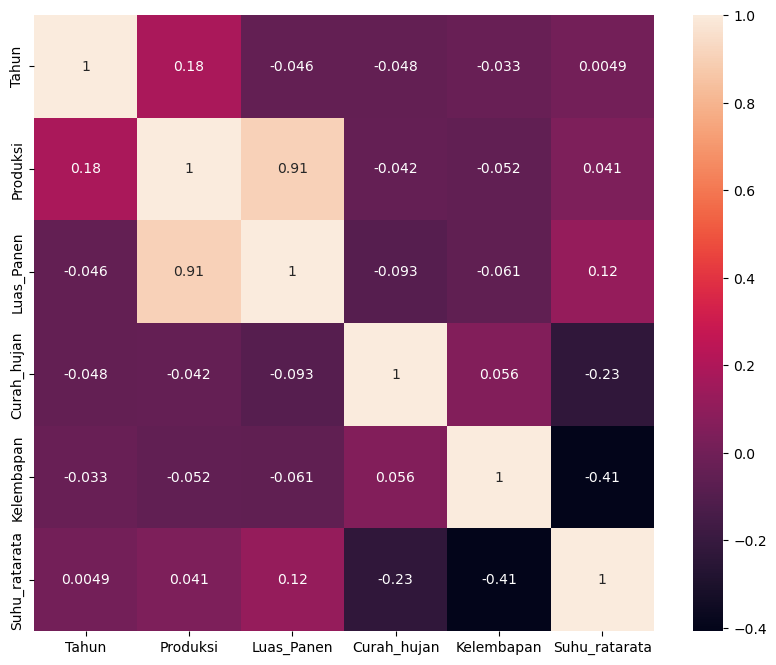

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Luas Panen berdasarkan Provinasi

In [36]:
item = df.groupby('Provinsi').count()[['Luas_Panen']].sort_values(by='Luas_Panen',ascending=True).reset_index()
item = item.rename(columns={'Luas_Panen':'LuasOfProv'})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aceh'),
  Text(1, 0, 'Bengkulu'),
  Text(2, 0, 'Jambi'),
  Text(3, 0, 'Lampung'),
  Text(4, 0, 'Riau'),
  Text(5, 0, 'Sumatera Barat'),
  Text(6, 0, 'Sumatera Selatan'),
  Text(7, 0, 'Sumatera Utara')])

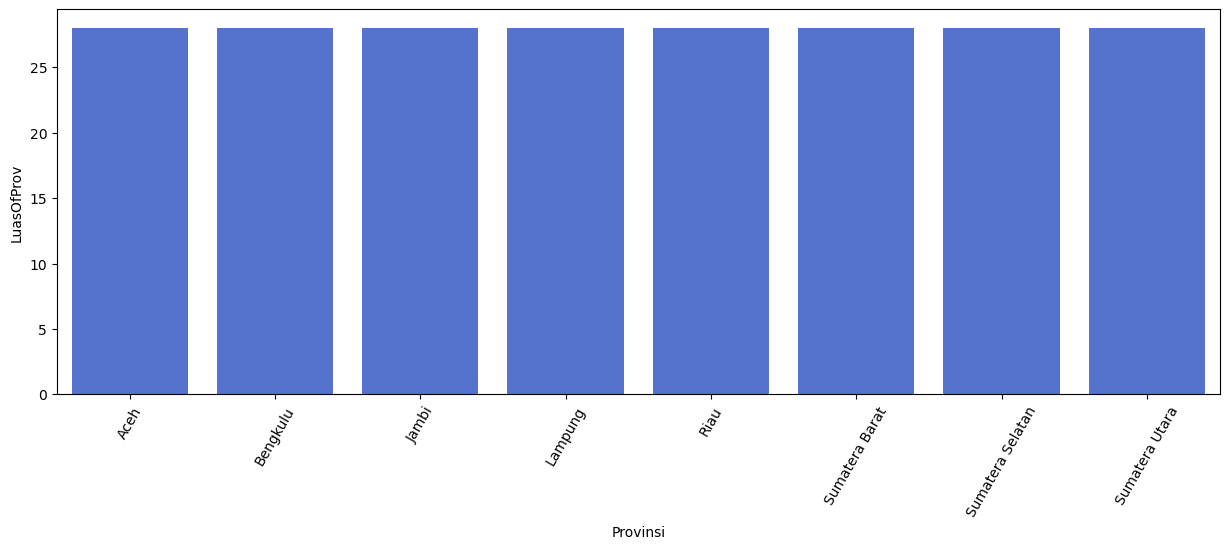

In [37]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=item['Provinsi'], y=item['LuasOfProv'], color='royalblue')
plt.xticks(rotation=60)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


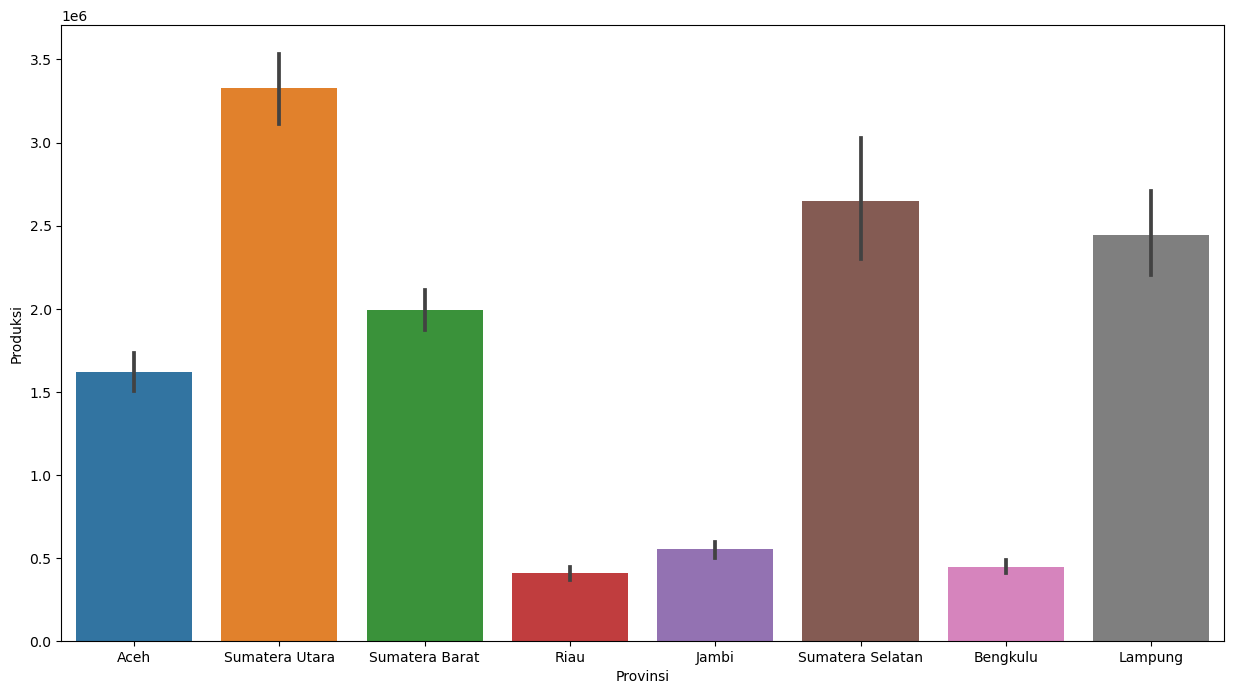

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(df['Provinsi'],df['Produksi'])
plt.show()

# Jumlah Produski Padi berdasarkan Suhu rata rata

In [60]:
item2 = df.groupby('Suhu_ratarata').count()[['Produksi']].sort_values(by='Produksi',ascending=True).reset_index()
item2= item2.rename(columns={'Produksi':'ProduksiOfSuhu'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135]),
 [Text(0, 0, '22.19'),
  Text(1, 0, '22.48'),
  Text(2, 0, '23.26'),
  Text(3, 0, '24.22'),
  Text(4, 0, '24.49'),
  Text(5, 0, '24.52'),
  Text(6, 0, '24.58'),
  Text(7, 0, '24.69'),
  Text(8, 0, '24.7'),
  Text(9, 0, '24.82'),
 

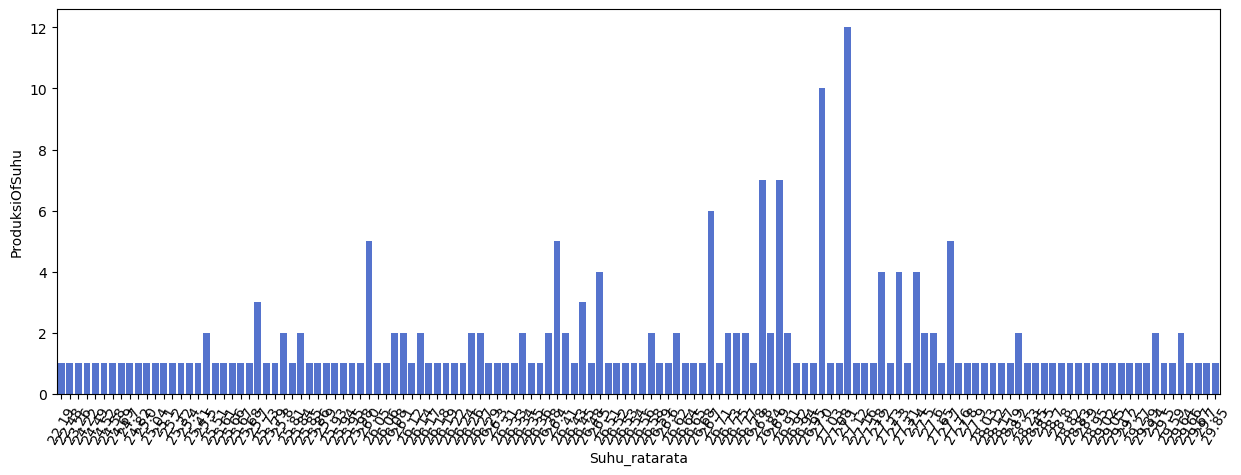

In [61]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=item2['Suhu_ratarata'], y=item2['ProduksiOfSuhu'], color='royalblue')
plt.xticks(rotation=60)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


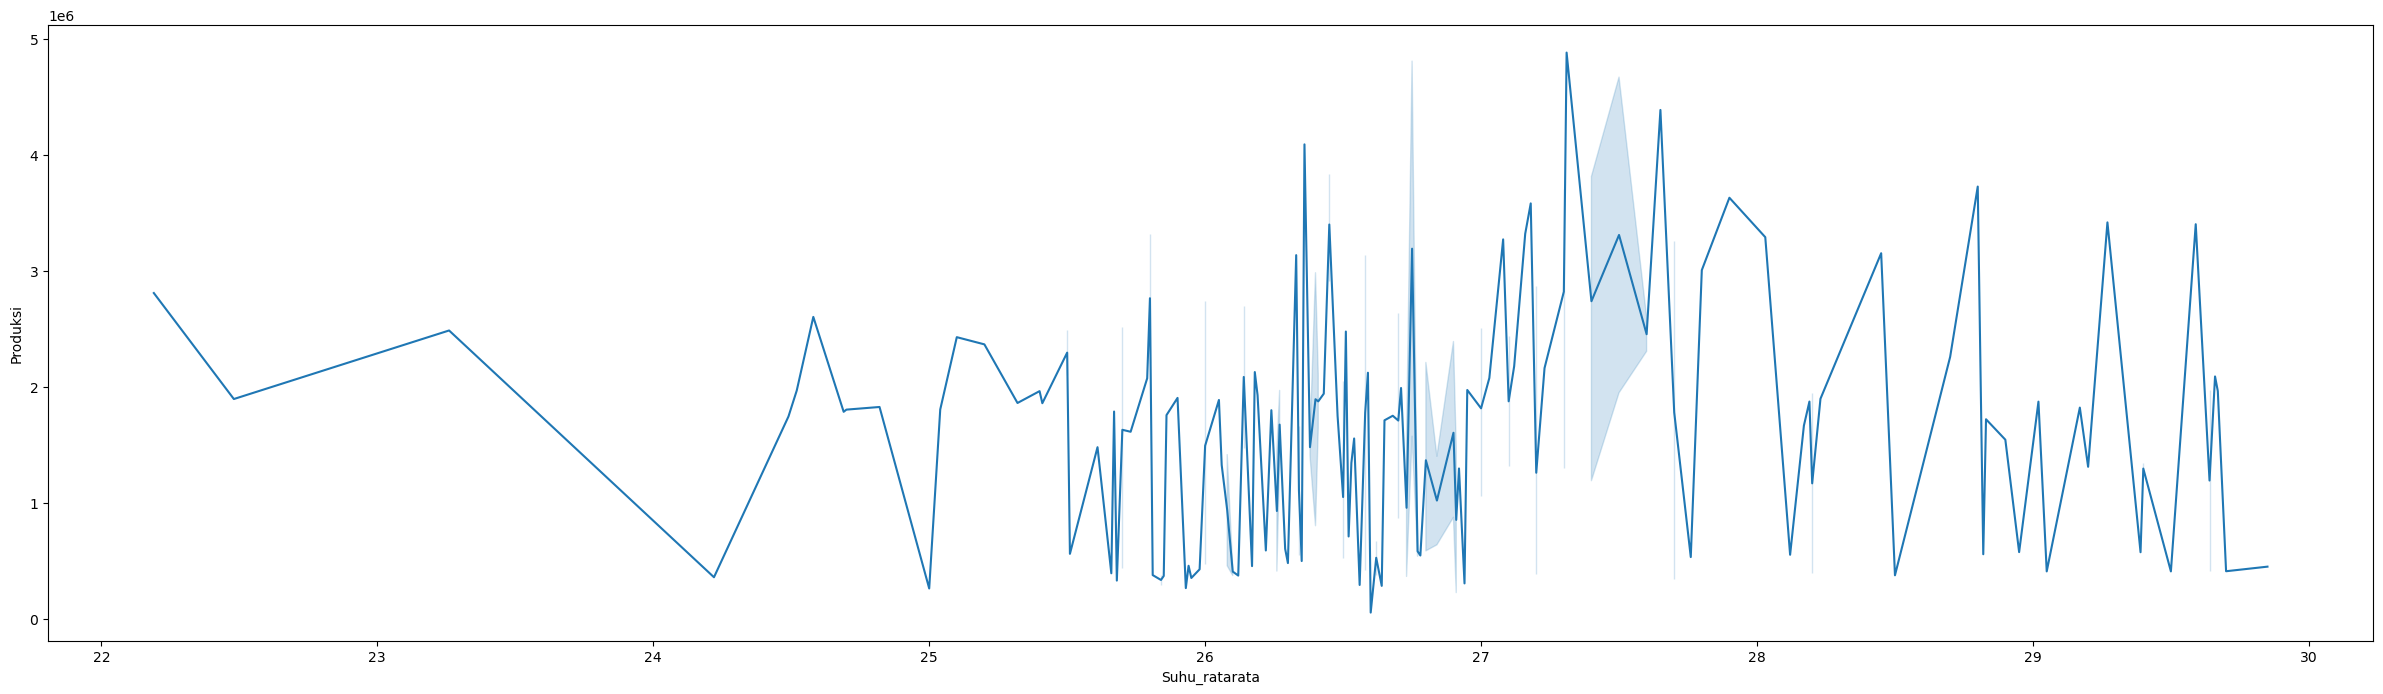

In [70]:
plt.figure(figsize=(30,8))
sns.lineplot(df['Suhu_ratarata'],df['Produksi'])
plt.show()

# Distribusi Jumlah Kalori

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Produksi', ylabel='Density'>

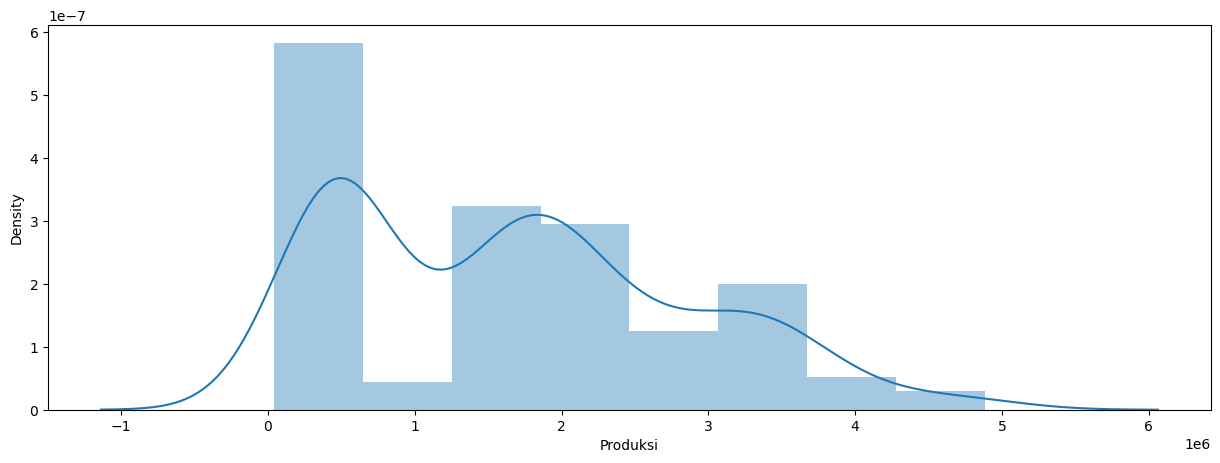

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(df['Produksi'])

# seleksi fitur

In [25]:
features = ['Tahun', 'Luas_Panen', 'Curah_hujan','Kelembapan', 'Suhu_ratarata']
x = df[features]
y = df['Produksi']
x.shape, y.shape
	

((224, 5), (224,))

# Split data training dan data testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

# Membuat model regresi linier

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [28]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9008590404584264


# Membuat inputan model regresi linier

In [62]:
#Tahun : 1993,Luas_Panen : 323589.00,Curah_hujan : 1627.00,Kelembapan: 82.00,Suhu_ratarata: 26.06

input_data = np.array([[1993,323589.00,1627.00,82.00,26.06]])

prediction = lr.predict(input_data)
print('Estimasi jumlah Produksi Padi di Pulau Sumatra :', prediction, 'TON')

Estimasi jumlah Produksi Padi di Pulau Sumatra : [979860.26531383] TON


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [71]:
import pickle

filename = 'estimasi_Produksipadi.sav'
pickle.dump(lr,open(filename,'wb'))